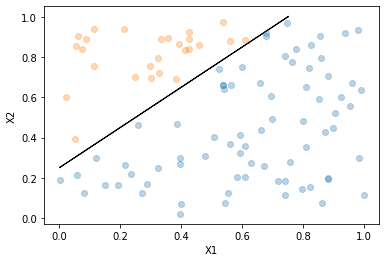

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def geradataset(tamanho=20):
    X = np.random.uniform(size=(tamanho,2))
    y = np.array(X[:,0]>X[:,1]-0.25, dtype=int)*2-1
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def perpendicular(vetor):
    rotaciona = np.array([[0,1],[-1,0]])
    perp = np.matmul(np.array(vetor),rotaciona)
    return perp

def plotahiperplano(vetor, bias=0):
    hiperplano = perpendicular(vetor)
    plt.arrow(*[0,bias], *(hiperplano-bias))

X, y = geradataset(100)
plotadataset(X, y)
plotahiperplano([1,-1],0.25)
plt.show()

# Funções de Custo

In [5]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(CustoPerceptron.erro(y, ypred), X)

class HingeLoss():
    @staticmethod
    def erro(y, ypred):
        return np.multiply(y, ypred)
    @staticmethod
    def custo(y, ypred):
        return np.sum(1 - HingeLoss.erro(y, ypred))
    @staticmethod
    def gradiente(y, ypred, X):
        marginais = HingeLoss.erro(y, ypred) < 1
        return np.matmul(y[marginais], X[marginais])

class Adaline():
    def __init__(self):
        self.preactivated = True
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum((1 - Adaline.erro(y, ypred))**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(Adaline.erro(y, ypred), X)


# Perceptron

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=Adaline(), alpha=0.014):
        self.w = None
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = 20
        self.custo = custo
        self.whist = []
        self.chist = []
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            if hasattr(self.custo, 'preactivated') and self.custo.preactivated:
                ypred = self.preactivate(X)
            else: 
                ypred = self.predict(X) 
            custo = self.custo.custo(y, ypred)
            print(custo)
            self.whist.append(self.w)
            self.chist.append(custo)
            if custo==0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)
        print(self.w)
    
    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        ypred = self.activation(a)
        return ypred


perceptron = Perceptron(custo=Adaline())
perceptron.fit(X, y)
ypred = perceptron.predict(X)
print(sum(y == ypred)/len(y))

128.88334536583153
326.88475293034634
81.40949040049584
418.37205552363116
59.16961453837468
625.483857906751
107.52921736085285
1071.2705968220316
362.1849706337634
2047.889419446246
1189.4636621310547
4254.362842772347
3541.3435159308774
9381.969447210253
9846.768389779105
21559.682350338466
26240.47934074411
50931.36249547061
68123.80981293906
122522.52206135128
[-25.73868374 -13.46850452 -16.36292077]
0.26


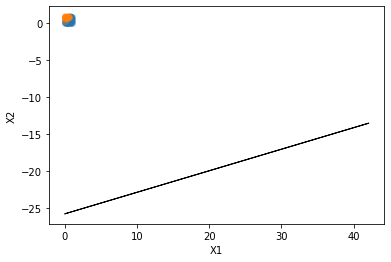

In [7]:
plotadataset(X, y)
plotahiperplano(perceptron.w[1:],perceptron.w[0])

In [8]:
whist = np.array(perceptron.whist)
chist = np.array(perceptron.chist)
whist, chist

(array([[  0.16944281,  -0.49371754,   0.23359523],
        [  0.8038822 ,   0.08601177,   0.34070537],
        [  0.02966771,  -0.16063692,  -0.31845054],
        [  1.0208786 ,   0.57571467,   0.04549562],
        [ -0.20754019,   0.02937898,  -0.82130522],
        [  1.34857427,   1.05075684,  -0.09507612],
        [ -0.59385413,   0.065669  ,  -1.32697323],
        [  1.85472822,   1.56631522,  -0.06291563],
        [ -1.2118353 ,  -0.08404132,  -1.89992782],
        [  2.64521295,   2.19568838,   0.18600107],
        [ -2.19249153,  -0.4827634 ,  -2.62811174],
        [  3.88621346,   3.04370187,   0.73320775],
        [ -3.74301748,  -1.23935244,  -3.63945324],
        [  5.83917677,   4.26720416,   1.71673814],
        [ -6.19057452,  -2.53289078,  -5.12725723],
        [  8.91587514,   6.10688027,   3.36163971],
        [-10.05134946,  -4.6515748 ,  -7.38973019],
        [ 13.76518994,   8.93701741,   6.02853145],
        [-16.13946083,  -8.0543722 , -10.8918987 ],
        [ 21

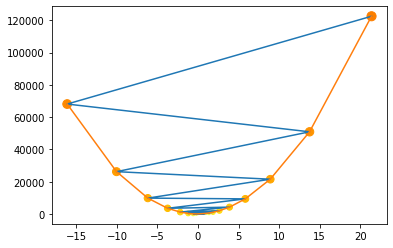

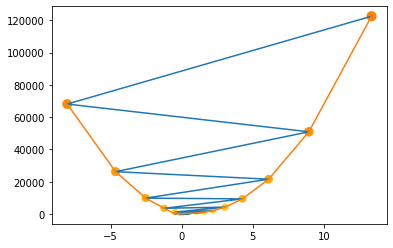

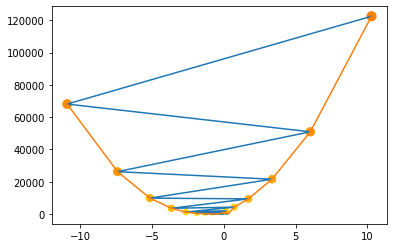

In [9]:
for i in range(whist.shape[1]):
    plt.plot(whist[:,i], chist, '-')
    seq = [j**1.5 for j in range(len(chist))]
    plt.scatter(whist[:,i], chist, s=seq, c=seq, cmap='Wistia')
    idx = np.argsort(whist[:,i])
    plt.plot(whist[idx,i], chist[idx])
    plt.show()

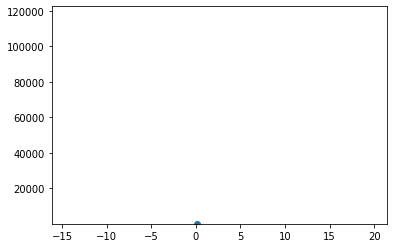

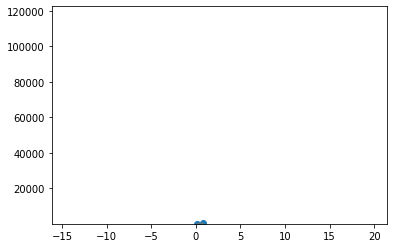

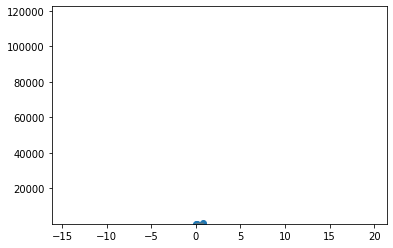

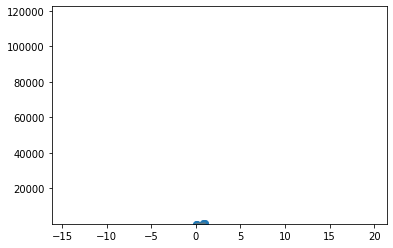

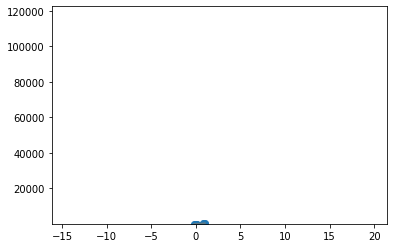

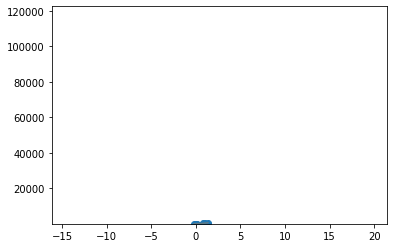

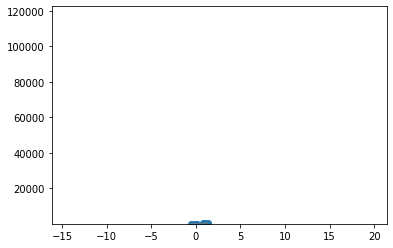

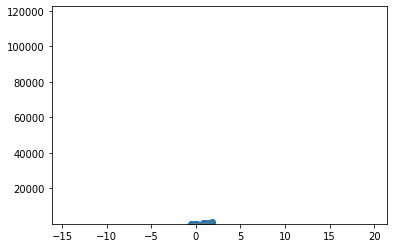

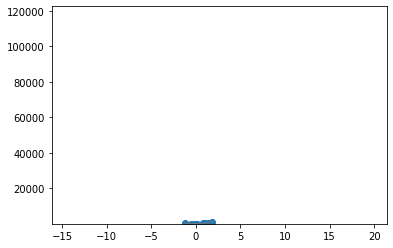

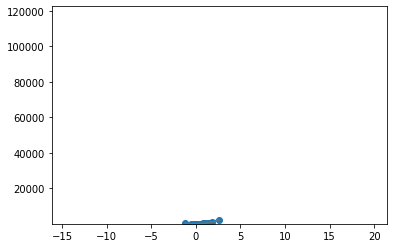

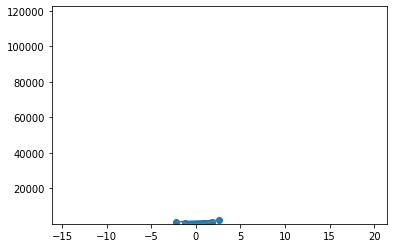

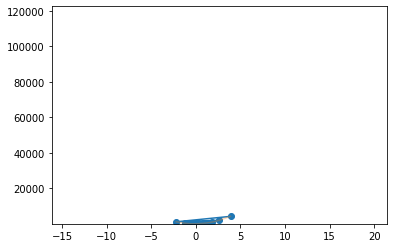

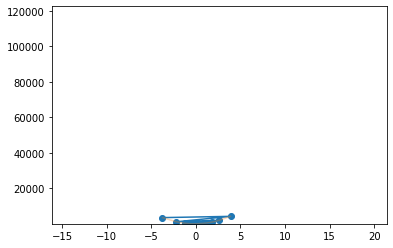

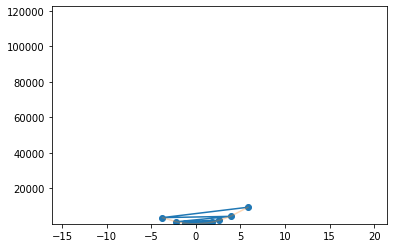

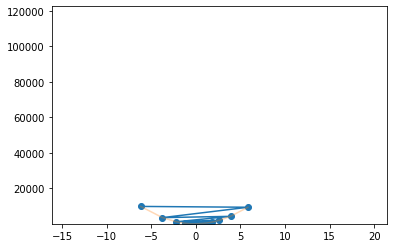

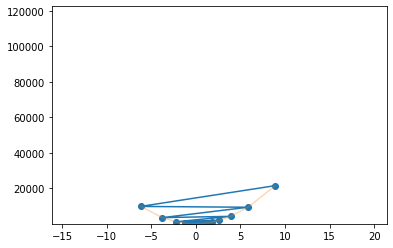

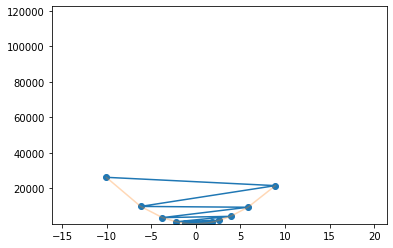

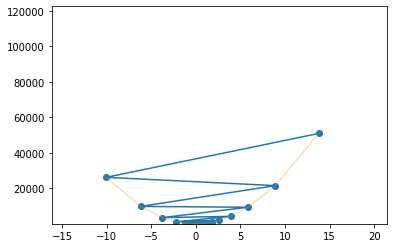

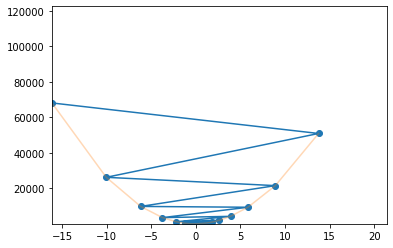

In [10]:
for i in range(1):
    for j in range(1,len(chist)):
        plt.plot(whist[:j,i], chist[:j], 'o-')
        idx = np.argsort(whist[:j,i])
        plt.plot(whist[idx,i], chist[idx], alpha=0.3)
        plt.xlim([np.min(whist), np.max(whist)])
        plt.ylim([np.min(chist), np.max(chist)])
        plt.show()